### Module -1 Dataset Setup and Image Labeling

Image counts: {'wrinkles': 100, 'darkspots': 99, 'puffy eyes': 101, 'clear face': 97}


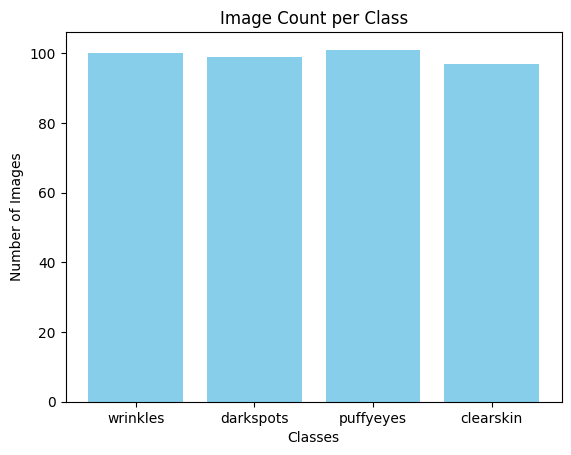

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

dataset_path = r"C:\Users\Shiva\OneDrive\Desktop\infosys\dataset"
outer_classes = [
    "wrinkles",
    "darkspots",
    "puffy eyes",
    "clear face"
]

counts = {}

for outer in outer_classes:
    outer_folder = os.path.join(dataset_path, outer)
    
    inner_folders = os.listdir(outer_folder)
    if inner_folders:
        inner_folder = os.path.join(outer_folder, inner_folders[0])  
        counts[outer] = len([f for f in os.listdir(inner_folder) 
                             if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    else:
        counts[outer] = 0

print("Image counts:", counts)

short_labels = ["wrinkles", "darkspots", "puffyeyes", "clearskin"]

plt.bar(short_labels, counts.values(), color="skyblue")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Image Count per Class")
plt.show()


### Module-2 Image Preprocessing and Augmentation

Found 319 images belonging to 4 classes.
Found 78 images belonging to 4 classes.
Classes found: {'clear face': 0, 'darkspots': 1, 'puffy eyes': 2, 'wrinkles': 3}


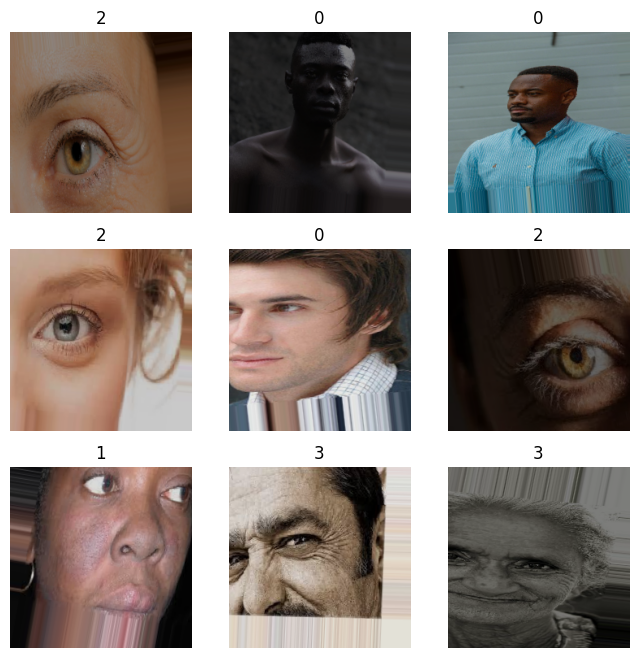

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

dataset_dir = "C:/Users/Shiva/OneDrive/Desktop/infosys/dataset" 

datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values to [0,1]
    rotation_range=10,           # Random rotation
    width_shift_range=0.2,       # Random horizontal shift
    height_shift_range=0.2,      # Random vertical shift
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Random horizontal flip
    brightness_range=[0.2, 1.2], # Random brightness
    validation_split=0.2         # 20% validation split
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),     # Resize images
    batch_size=16,
    class_mode='categorical',   # One-hot encoding
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

print("Classes found:", train_gen.class_indices)

x_batch, y_batch = next(train_gen)
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))
    plt.axis('off')
plt.show()


### Module 3 :Model Training with MobileNetV2


Found 319 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


C:\Users\Shiva\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4516 - loss: 1.5954
Epoch 1: val_accuracy improved from None to 0.64103, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5172 - loss: 1.4314 - val_accuracy: 0.6410 - val_loss: 1.0177 - learning_rate: 0.0010
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7128 - loss: 0.8724
Epoch 2: val_accuracy improved from 0.64103 to 0.66667, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7398 - loss: 0.7815 - val_accuracy: 0.6667 - val_loss: 0.8766 - learning_rate: 0.0010
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8053 - loss: 0.6331
Epoch 3: val_accuracy improved from 0.66667 to 0.76923, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8025 - loss: 0.6146 - val_accuracy: 0.7692 - val_loss: 0.8056 - learning_rate: 0.0010
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8144 - loss: 0.5890
Epoch 4: val_accuracy did not improve from 0.76923
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7962 - loss: 0.6049 - val_accuracy: 0.7436 - val_loss: 0.7937 - learning_rate: 0.0010
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8608 - loss: 0.3733
Epoch 5: val_accuracy did not improve from 0.76923
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8621 - loss: 0.4073 - val_accuracy: 0.7692 - val_loss: 0.7227 - learning_rate: 0.0010
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8430 - loss: 0.4402
Epoch 6: val_accuracy improved from 0.76923 to 0.79487, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8339 - loss: 0.4338 - val_accuracy: 0.7949 - val_loss: 0.5946 - learning_rate: 0.0010
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8788 - loss: 0.3280
Epoch 7: val_accuracy did not improve from 0.79487
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8683 - loss: 0.3211 - val_accuracy: 0.7821 - val_loss: 0.6405 - learning_rate: 0.0010
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8500 - loss: 0.4257
Epoch 8: val_accuracy did not improve from 0.79487
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8652 - loss: 0.4013 - val_accuracy: 0.7564 - val_loss: 0.6100 - learning_rate: 0.0010
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8689 - loss: 0.3522
Epoch 9: val_accuracy did not improve from 0.79487
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8652 - loss: 0.3768 - val_accuracy: 0.7692 - val_loss: 0.5765 - learning_rate: 0.0010
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8746 - loss: 0.3102 - val_accuracy: 0.8718 - val_loss: 0.5866 - learning_rate: 0.0010
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9186 - loss: 0.2673
Epoch 11: val_accuracy did not improve from 0.87179
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9028 - loss: 0.2845 - val_accuracy: 0.7692 - val_loss: 0.6318 - learning_rate: 0.0010
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8689 - loss: 0.2966
Epoch 12: val_accuracy did not improve from 0.87179
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8777 - loss: 0.2762 - val_accuracy: 0.8205 - val_loss: 0.6639 - learning_rate: 0.0010
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9034 - loss: 0.3193
Epoch 13: val_accuracy did not improve from 0.87179

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8903 - loss: 0.3503 - val_accuracy: 0.8205 -

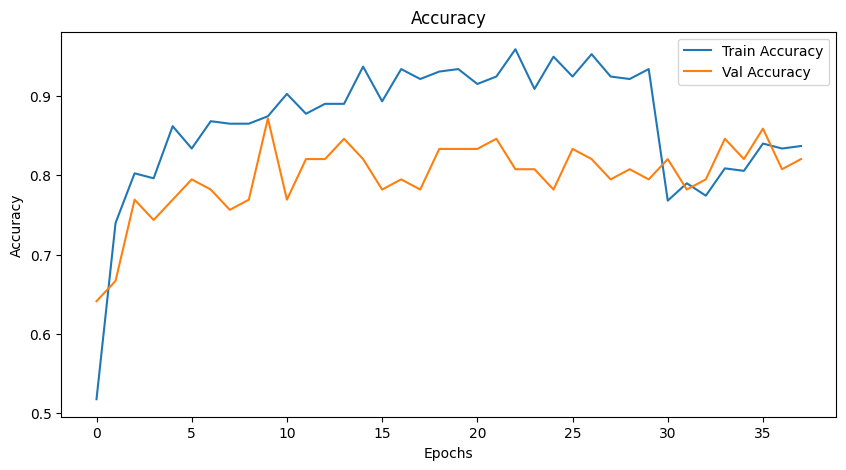

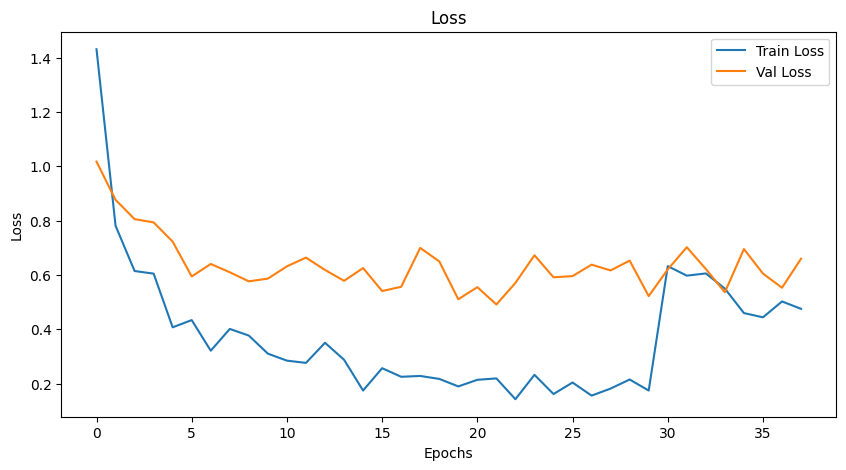

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

dataset_path = r"C:\Users\Shiva\OneDrive\Desktop\infosys\dataset"

# ===================== DATA AUGMENTATION =====================
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# ===================== BASE MODEL =====================
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False

# ===================== CUSTOM HEAD =====================
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ===================== COMPILE & TRAIN =====================
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[checkpoint, reduce_lr, early_stop],
    verbose=1
)

# ===================== FINE-TUNE MORE LAYERS =====================
for layer in base_model.layers[-50:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint, reduce_lr, early_stop],
    verbose=1
)

# ===================== PLOTS =====================
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'] + history_finetune.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### Module 4: Face Detection and Prediction Pipeline 

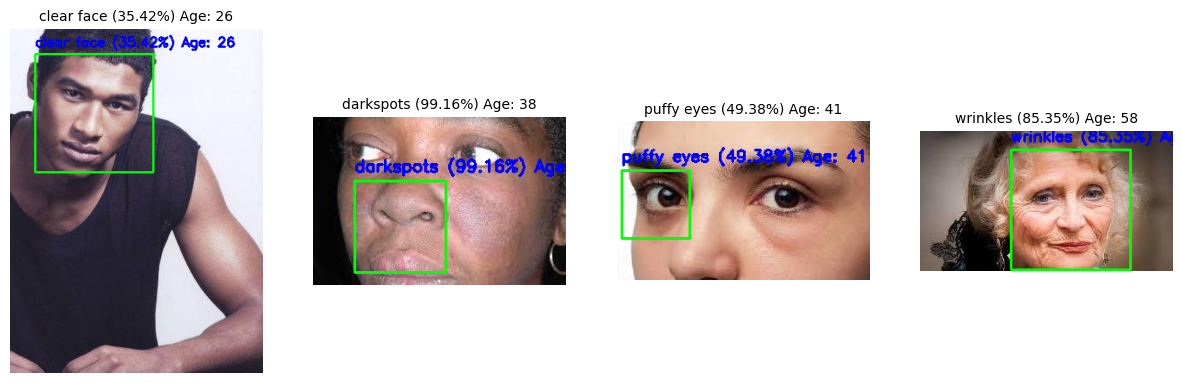

In [13]:
import cv2
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# -----------------------------
# Suppress TensorFlow logs
# -----------------------------
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')

# -----------------------------
# Load model
# -----------------------------
model_path = r"C:\Users\Shiva\OneDrive\Desktop\infosys\best_model.h5"
model = load_model(model_path)

# Class labels
class_labels = ['clear face', 'darkspots', 'puffy eyes', 'wrinkles']

# Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Age estimation
def estimate_age(pred_class):
    if pred_class == 'clear face':
        return np.random.randint(18, 30)
    elif pred_class == 'darkspots':
        return np.random.randint(30, 40)
    elif pred_class == 'puffy eyes':
        return np.random.randint(35, 50)
    elif pred_class == 'wrinkles':
        return np.random.randint(50, 70)
    else:
        return np.random.randint(20, 60)

# -----------------------------
# Detect and predict single bounding box per image
# -----------------------------
def detect_and_predict_single(image_path, target_class):
    image = cv2.imread(image_path)
    if image is None:
        return None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=3)

    if len(faces) == 0:
        return None

    for (x, y, w, h) in faces:
        roi = image[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi, (224, 224))
        roi_array = img_to_array(roi_resized) / 255.0
        roi_array = np.expand_dims(roi_array, axis=0)

        preds = model.predict(roi_array, verbose=0)
        pred_idx = np.argmax(preds)
        pred_class = class_labels[pred_idx]
        pred_conf = preds[0][pred_idx] * 100
        pred_age = estimate_age(pred_class)

        if pred_class == target_class:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
            text = f"{pred_class} ({pred_conf:.2f}%) Age: {pred_age}"
            cv2.putText(image, text, (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
            return cv2.cvtColor(image, cv2.COLOR_BGR2RGB), text

    return None  # No face matches target class

# -----------------------------
# Pick one valid image per class
# -----------------------------
dataset_path = r"C:\Users\Shiva\OneDrive\Desktop\infosys\dataset"

plt.figure(figsize=(15, 5))
subplot_idx = 1

for class_name in class_labels:
    class_folder = os.path.join(dataset_path, class_name, class_name)
    if not os.path.exists(class_folder):
        continue

    images = [f for f in os.listdir(class_folder) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    if not images:
        continue

    random.shuffle(images)  # Shuffle to try different images

    img_rgb, text = None, None
    for img_name in images:
        img_path = os.path.join(class_folder, img_name)
        result = detect_and_predict_single(img_path, class_name)
        if result is not None:
            img_rgb, text = result
            break  # Stop after finding one valid image

    if img_rgb is not None:
        plt.subplot(1, len(class_labels), subplot_idx)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(text, fontsize=10)
        subplot_idx += 1

plt.show()
